In [51]:
%matplotlib inline
import numpy
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

### 東京大学数理・データサイエンスコンソーシアム 社会人向け講座 2019年秋

# 解析・線形代数入門 〜データサイエンスのための〜

# 2-4 固有値分解

##  固有値・固有ベクトル

行列$\displaystyle A = \frac{1}{2} \begin{bmatrix} 5 & -1 \\ -1 & 5 \end{bmatrix}$による線型写像を考える

[[-0.08990802]
 [-0.19572053]]
[[-0.12690978]
 [-0.44434733]]
[[-0.08990802 -0.12690978]
 [-0.19572053 -0.44434733]]


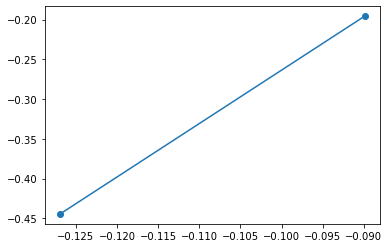

In [37]:
A = numpy.array([[5, -1], [-1, 5]]) / 2;
x = (numpy.random.rand(2, 1) - numpy.array([[0.5],[0.5]])); # -0.5 < x < 0.5, -0.5 < y < 0.5 内にランダムな点xを生成
print(x);
print(A @ x);
H = numpy.block([x, A @ x]); # x (変換元) と Ax (変換先)を並べた 2x2 の行列を作成
print(H);
pyplot.plot(H[0,:], H[1,:], "o-"); # x (変換元) と Ax (変換先)を線でつなぐ

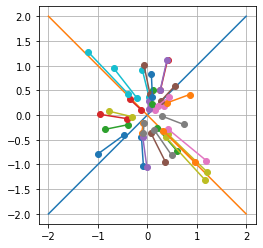

In [38]:
x = numpy.linspace(-2,2);
pyplot.plot(x, x); # 直線 y=x 
pyplot.plot(x, -x); # 直線 y=-x
for i in range(30):
    x = (numpy.random.rand(2, 1) - numpy.array([[0.5],[0.5]]));
    H = numpy.block([x, A @ x]);
    pyplot.plot(H[0,:], H[1,:], "o-");
pyplot.gca().set_aspect('equal');
pyplot.grid(which="major");

* 直線$y=x$あるいは$y=-x$に近い点は、直線に沿って移っているようにみえる
* 実際<br>
  $\displaystyle A \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 2 \end{bmatrix} = 2 \begin{bmatrix} 1 \\ 1 \end{bmatrix}$<br>
  $\displaystyle A \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} 3 \\ -3 \end{bmatrix} = 3 \begin{bmatrix} 1 \\ -1 \end{bmatrix}$

* より一般の正方行列$A$に対して<br>
  $A \vec{x} = \lambda \vec{x}$<br>
  をみたす定数$\lambda$および零でないベクトル$\vec{x}$が存在するとき、$\lambda$を行列$A$の「固有値」、$\vec{x}$を「固有ベクトル」という

## 固有値・固有ベクトルの求め方

* $A \vec{x} = \lambda \vec{x} = \lambda E \vec{x}$ ⇒ $(\lambda E - A)\vec{x} = 0$
* $(\lambda E - A)$の逆行列$(\lambda E - A)^{-1}$が存在するなら、それを左から両辺にかけると$\vec{x}=0$となってしまう
* 零でない$\vec{x}$が存在するには<br>
  $\Phi_A(\lambda) = \det (\lambda E - A) = 0$
* この方程式を$A$の「固有方程式」あるいは「特性方程式」という

* $2 \times 2$行列$\displaystyle A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$の場合<br>
  $\displaystyle \Phi_A(\lambda) = \det (\lambda E - A) = \det \begin{bmatrix} \lambda - a & -b \\ -c & \lambda - d \end{bmatrix} = (\lambda - a)(\lambda - d) - bc = \lambda^2 - (a+d) \lambda + (ad-bc) = 0$
* $\displaystyle A = \frac{1}{2} \begin{bmatrix} 5 & -1 \\ -1 & 5 \end{bmatrix}$の場合<br>
  $\displaystyle \Phi_A(\lambda) = \lambda^2 - 5 \lambda + 6 = (\lambda - 2) (\lambda - 3) = 0$ ⇒ 固有値は$\lambda=2,3$
  * $\lambda=2$のとき<br>
    $\displaystyle (\lambda E - A)\vec{x} = \frac{1}{2} \begin{bmatrix} -1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ ⇒ $\displaystyle \vec{x}_{\lambda=2} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$
  * $\lambda=3$のとき<br>
    $\displaystyle (\lambda E - A)\vec{x} = \frac{1}{2} \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ ⇒ $\displaystyle \vec{x}_{\lambda=3} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$

* 一般に$n$次正方行列の場合、$\Phi_A(\lambda)$は$\lambda$の$n$次多項式(「固有多項式」あるいは「特性多項式」という) ⇒ $n$次の固有値と対応する固有ベクトルが存在

## 行列の対角化

* $2 \times 2$行列$A$の固有値を$\alpha,\beta$、対応する固有ベクトルを$\displaystyle \vec{v}_{\alpha} = \begin{bmatrix} v_{\alpha 1} \\ v_{\alpha 2} \end{bmatrix}, \vec{v}_{\beta} = \begin{bmatrix} v_{\beta 1} \\ v_{\beta 2} \end{bmatrix}$とすると<br>
  $A \vec{v}_{\alpha} = \alpha \vec{v}_{\alpha}, A \vec{v}_{\beta} = \beta \vec{v}_{\beta}$
* $\vec{v}_{\alpha}, \vec{v}_{\beta}$をならべて$2 \times 2$行列$\displaystyle P = \begin{bmatrix} v_{\alpha 1} & v_{\beta 1} \\ v_{\alpha 2} & v_{\beta 2} \end{bmatrix}$を作ると<br>
  $\displaystyle AP = \begin{bmatrix} \alpha v_{\alpha 1} & \beta v_{\beta 1} \\ \alpha v_{\alpha 2} & \beta v_{\beta 2} \end{bmatrix} = \begin{bmatrix} v_{\alpha 1} & v_{\beta 1} \\ v_{\alpha 2} & v_{\beta 2} \end{bmatrix}  \begin{bmatrix} \alpha & 0 \\ 0 & \beta \end{bmatrix} = P \begin{bmatrix} \alpha & 0 \\ 0 & \beta \end{bmatrix}$
* $P$を正則とすると、両辺に左から$P^{-1}$をかけて<br>
  $P^{-1} A P = \begin{bmatrix} \alpha & 0 \\ 0 & \beta \end{bmatrix}$ $(=D)$
* これを行列$A$の「対角化」あるいは「固有値分解」という

## 対角化の意味

* 一般に任意のベクトル$\displaystyle \begin{bmatrix} x \\ y \end{bmatrix}$は$\vec{v}_\alpha$と$\vec{v}_\beta$の和で書ける(「線型結合」という)<br>
  $\displaystyle \begin{bmatrix} x \\ y \end{bmatrix} = s \begin{bmatrix} v_{\alpha 1} \\ v_{\alpha 2} \end{bmatrix} + t \begin{bmatrix} v_{\beta 1} \\ v_{\beta 2} \end{bmatrix} = P \begin{bmatrix} s \\ t \end{bmatrix}$
* 実際、両辺に左から$P^{-1}$をかけると<br>
  $\displaystyle \begin{bmatrix} s \\ t \end{bmatrix} = P^{-1} \begin{bmatrix} x \\ y \end{bmatrix}$
* 一方、$A$による線形変換で、$\displaystyle \begin{bmatrix} x \\ y \end{bmatrix}$が$\displaystyle \begin{bmatrix} x' \\ y' \end{bmatrix}$に移るとすると<br>
  $\displaystyle \begin{bmatrix} x' \\ y' \end{bmatrix} = A \begin{bmatrix} x \\ y \end{bmatrix}$
* この$\displaystyle \begin{bmatrix} x' \\ y' \end{bmatrix}$を、同様に$\vec{v}_\alpha$と$\vec{v}_\beta$の線形結合であらわすと<br>
  $\displaystyle \begin{bmatrix} x' \\ y' \end{bmatrix} = P \begin{bmatrix} s' \\ t' \end{bmatrix}$ ここで   $\displaystyle \begin{bmatrix} s' \\ t' \end{bmatrix} = P^{-1} \begin{bmatrix} x' \\ y' \end{bmatrix}$
* 以上を用いると<br>
  $\displaystyle \begin{bmatrix} x' \\ y' \end{bmatrix} = P \begin{bmatrix} s' \\ t' \end{bmatrix} = A \begin{bmatrix} x \\ y \end{bmatrix} = A P \begin{bmatrix} s \\ t \end{bmatrix}$
* 左から$P^{-1}$をかけて<br>
  $\begin{bmatrix} s' \\ t' \end{bmatrix} = P^{-1} A P \begin{bmatrix} s \\ t \end{bmatrix} = \begin{bmatrix} \alpha & 0 \\ 0 & \beta \end{bmatrix} \begin{bmatrix} s \\ t \end{bmatrix} = \begin{bmatrix} \alpha s \\ \beta t \end{bmatrix}$
* 線形結合の係数($s,t$)でみると、$A$による線形変換はそれぞれの要素が固有値倍されるだけ
* あるいは<br>
  $\displaystyle \begin{bmatrix} x' \\ y' \end{bmatrix} = P P^{-1} A P P^{-1} \begin{bmatrix} x \\ y \end{bmatrix} = PDP^{-1} \begin{bmatrix} x \\ y \end{bmatrix}$

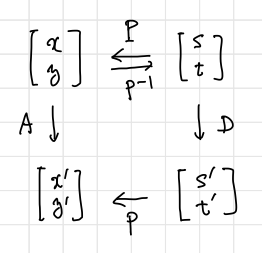

In [41]:
Image('fig-2-4-1.png')

## 対称行列

* 一般の正方行列 ⇒ 必ずしも対角化できるとは限らない
  * (参考: 対角化のかわりに「特異値分解」を考えることが可能)
* 対称行列(${}^tA = A$)の場合 ⇒ つねに対角化可能
* 特に、それぞれの固有ベクトルを長さが1 (${}^t\vec{v}_\lambda \vec{v}_\lambda = 1$)になるように定数で割って「規格化」しておくと<br>
  $P^{-1} = {}^t P$
* すなわち$P$は直交行列となり、$A = PD{}^tP$ (あるいは${}^tP A P = D$)と書ける

## Pythonによる対角化

* numpy.linalg.eigh()関数を使う

In [46]:
A = numpy.array([[5, -1], [-1, 5]]) / 2;
evals, evecs = numpy.linalg.eigh(A);
print('Eigenvalues =', evals);
print('Eigenvectors (P) =', evecs);

Eigenvalues = [2. 3.]
Eigenvectors (P) = [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [49]:
# 対角化
evecs.transpose() @ A @ evecs

array([[2., 0.],
       [0., 3.]])

In [48]:
# 直交行列となっていることの確認
evecs.transpose() @ evecs

array([[1., 0.],
       [0., 1.]])

## 固有値と行列のランク、行列式の関係

* 行列$A$の固有値のうちあるものが零 ⇒ 対応する固有ベクトルの係数が線形変換により零となる ⇒ 行列のランクは「非零固有値の数」に等しい
* 行列の積の行列式 = 行列式の積なので<br>
  $\det (A) = \det (PDP^{-1}) = \det(P) \det(D) \det(P^{-1}) = \det(P P^{-1}) \det(D) = \det(D) = \lambda_1 \lambda_2 \cdots \lambda_n$
* 零固有値が1つでもあると行列式は零となる ⇒ $A$は正則でない
* 実際、全ての固有値が非零の場合<br>
  $\displaystyle A^{-1} = P D^{-1} P^{-1} = P \begin{bmatrix} \lambda_1^{-1} & & & \\ & \lambda_2^{-1} & & \\ & & \ddots & \\ & & & \lambda_n^{-1} \end{bmatrix} P^{-1}$ <br>
  と書ける (逆に1つでも零固有値があると$D^{-1}$は定義できない)

## 2次形式

* $a_1 x^2 + a_2 xy + a_3 y^2$のように、全ての項に$x$と$y$が合計2つ入っているような形の式を「2次形式」という
* $\displaystyle \vec{x} = \begin{bmatrix} x \\ y \end{bmatrix}$、さらに$a = a_1, b = c= a_2/2, d=a_3$おいて、対称行列$\displaystyle A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$を導入すると<br>
  ${}^t \vec{x} A \vec{x}$<br>
  と書ける
* さらに、$A=PD{}^tP$と対角化すると<br>
  ${}^t \vec{x} A \vec{x} = {}^t \vec{x} PD{}^tP \vec{x} = {}^t({}^t  P\vec{x}) D {}^t({}^t  P\vec{x}) =  \vec{x}' D \vec{x}' = \alpha x'^2 + \beta y'^2$<br>
  と書ける($\displaystyle \vec{x}' = {}^tP\vec{x}$とおいた)
* 固有値$\alpha,\beta$が両方とも正の場合 ⇒ 任意の$\vec{x} \ne 0$に対して$a_1 x^2 + a_2 xy + a_3 y^2>0$ ⇒ 「正定値」という
* 固有値$\alpha,\beta$が両方とも負の場合 ⇒ 任意の$\vec{x} \ne 0$に対して$a_1 x^2 + a_2 xy + a_3 y^2<0$ ⇒ 「負定値」という

## 2変数関数の極大・極小

* 1変数関数の場合
  * $x=x_0$で$f(x)$が極値をとる条件 → $f'(x_0) = 0$
    * 極大値: $f''(x_0) < 0$
    * 極小値: $f''(x_0) > 0$
* 2変数関数$f(x,y)$が極大・極小をとるための条件
  * 点$(x_0,y_0)$で$f(x,y)$が極大 ⇔ $(x_0,y_0)$のまわりの点$(x,y)$で、$f(x,y) < f(x_0,y_0)$
  * 点$(x_0,y_0)$で$f(x,y)$が極小 ⇔ $(x_0,y_0)$のまわりの点$(x,y)$で、$f(x,y) > f(x_0,y_0)$
  * 極値をとるための条件<br>
    $\displaystyle \frac{\partial f}{\partial x} (x_0,y_0) = \frac{\partial f}{\partial y} (x_0,y_0) = 0$
* 2変数関数の$(x_0,y_0)$のまわりでのテイラー展開
  * $f(x,y) \simeq a_0 + a_1 (x-x_0) + a_2 (y-y_0) + a_{11} (x-x_0)^2 + a_{12} (x-x_0)(y-y_0) + a_{22}(y-y_0)^2$と近似する
  * $f(x,y)$の偏微分をとり、$(x,y)=(x_0,y_0)$とおいて両辺を比較すると<br>
    $a_0 = f(x_0,y_0), a_1 = f_x(x_0,y_0), a_2 = f_y(x_0,y_0), a_{11} = \frac{1}{2} f_{xx}(x_0,y_0), a_{12} = f_{xy}(x_0,y_0), a_{22} = \frac{1}{2} f_{yy}(x_0,y_0)$
  * 特に、$\displaystyle \frac{\partial f}{\partial x} (x_0,y_0) = \frac{\partial f}{\partial y} (x_0,y_0) = 0$をみたす点のまわりでのテイラー展開を考えると<br>
    $f(x,y) \simeq a_0 + a_{11} (x-x_0)^2 + a_{12} (x-x_0)(y-y_0) + a_{22}(y-y_0)^2$
  * 行列$\displaystyle H = \begin{bmatrix} f_{xx}(x_0,y_0) & f_{xy}(x_0,y_0) \\ f_{yx}(x_0,y_0) & f_{yy}(x_0,y_0) \end{bmatrix}$とベクトル$\vec{x} = \begin{bmatrix} x-x_0 \\ y-y_0 \end{bmatrix}$を導入すると<br>
    $f(x,y) \simeq a_0 + \frac{1}{2} {}^t \vec{x} H \vec{x} \ $ (定数+2次形式)
  * 行列$H$を「ヘッセ行列」あるいは「ヘシアン」という
  * $H$の固有値が全て正 ⇒ $f(x,y)$は$(x,y)=(x_0,y_0)$で極小値
  * $H$の固有値が全て負 ⇒ $f(x,y)$は$(x,y)=(x_0,y_0)$で極大値
  * $H$が正と負の固有値を持つ ⇒ $(x,y)=(x_0,y_0)$は鞍点

* 例1: $f(x,y)=x^2+y^2$
  * $f_x(x,y)=2x=0, f_y(x,y)=2y=0$ ⇒ $(x_0,y_0)=(0,0)$
  * $f_{xx}(x_0,y_0)=2, f_{xy}(x_0,y_0)=0, f_{yx}(x_0,y_0)=0, f_{yy}(x_0,y_0)=2$ ⇒ $\displaystyle H = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$ ⇒ 固有値 2,2 ⇒ 極小

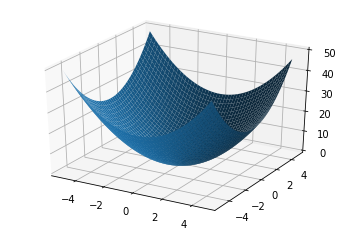

In [52]:
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
fig = pyplot.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x, y, x**2+y**2);

* 例2: $f(x,y)=x^2-y^2$
  * $f_x(x,y)=2x=0, f_y(x,y)=2y=0$ ⇒ $(x_0,y_0)=(0,0)$
  * $f_{xx}(x_0,y_0)=2, f_{xy}(x_0,y_0)=0, f_{yx}(x_0,y_0)=0, f_{yy}(x_0,y_0)=-2$ ⇒ $\displaystyle H = \begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$ ⇒ 固有値 2,-2 ⇒ 鞍点

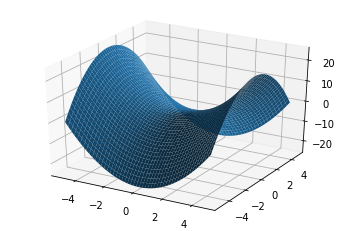

In [53]:
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
fig = pyplot.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x, y, x**2-y**2);

* 例2: $f(x,y)=x^2 + 2xy + y^3$
* $f_x(x,y)=2x+2y=0, f_y(x,y)=2x+3y^2=0$ ⇒ $(x_0,y_0)=(0,0), (-2/3,2/3)$
  * $(x_0,y_0)=(0,0)$ ⇒ $f_xx(x_0,y_0)=2, f_xy(x_0,y_0)=2, f_yx(x_0,y_0)=2, f_yy(x_0,y_0)=0$ ⇒ $\displaystyle H = \begin{bmatrix} 2 & 2 \\ 2 & 0 \end{bmatrix}$ ⇒ 固有値 $1 \pm \sqrt{5}$ ⇒ 鞍点
  * $(x_0,y_0)=(-2/3,2/3)$ ⇒ $f_xx(x_0,y_0)=2, f_xy(x_0,y_0)=2, f_yx(x_0,y_0)=2, f_yy(x_0,y_0)=4$ ⇒ $\displaystyle H = \begin{bmatrix} 2 & 2 \\ 2 & 4 \end{bmatrix}$ ⇒ 固有値 $3 \pm \sqrt{5}$ ⇒ 極小値

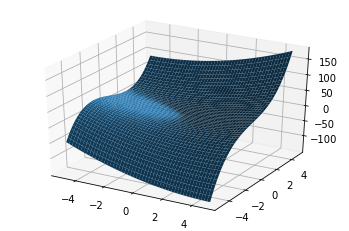

In [54]:
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
fig = pyplot.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x, y, x**2 + 2 * x * y + y**3);